In [1]:
import pandas as pd 
import json 

In [2]:
import os, glob 


def load_json_files(path):

    with open(path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data


# Corpus

- Các câu hỏi cần trả lời trên tập corpus: 
    1. Thống kê cơ bản trên bộ dữ liệu (số lượng id, phân bố aid cho mỗi id)
    2. Phân bố số lượng token (sau khi tokenize) của toàn bộ tập corpus 

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 



folder_path = "../data/vlsp/legal_corpus.json"
corpus = load_json_files(folder_path)

In [6]:
# basic statistics 

def count_content_length(corpus, bins = 60): 
    
    content_counts = {}
    for item in corpus:
        if 'id' in item and 'content' in item:
            content_id = item['id']
            content = item['content']
            
            if isinstance(content, list):
                content_counts[content_id] = len(content)
            else:
                content_counts[content_id] = 1
    
    content_count_df = pd.DataFrame(list(content_counts.items()), columns=['id', 'content_count'])
    
    print("Thống kê số lượng content trong mỗi id:")
    print(f"Tổng số id: {len(content_counts)}")
    print(f"Trung bình số content mỗi id: {sum(content_counts.values()) / len(content_counts):.2f}")
    print(f"Số content ít nhất: {min(content_counts.values())}")
    print(f"Số content nhiều nhất: {max(content_counts.values())}")
   

    plt.figure(figsize=(20, 12))
    # Xác định các khoảng bins
    min_count = content_count_df['content_count'].min()
    max_count = content_count_df['content_count'].max()
    bin_edges = np.linspace(min_count, max_count, bins + 1, dtype=int)
    sns.histplot(content_count_df['content_count'], bins=bin_edges, kde=True)
    plt.title('Phân phối số lượng content trong mỗi id')
    plt.xlabel('Số lượng content')
    plt.ylabel('Số lượng id trong mỗi nhóm content')
    plt.grid(True, alpha=0.3)

    # Vẽ các đường phân chia bins
    for edge in bin_edges[1:-1]:
        plt.axvline(edge, color='red', linestyle='--', alpha=0.7)
        plt.text(edge, plt.ylim()[1]*0.95, str(edge), color='red', rotation=90, va='top', ha='right', fontsize=8)

    plt.show()

    return content_count_df


Thống kê số lượng content trong mỗi id:
Tổng số id: 2157
Trung bình số content mỗi id: 27.65
Số content ít nhất: 0
Số content nhiều nhất: 689


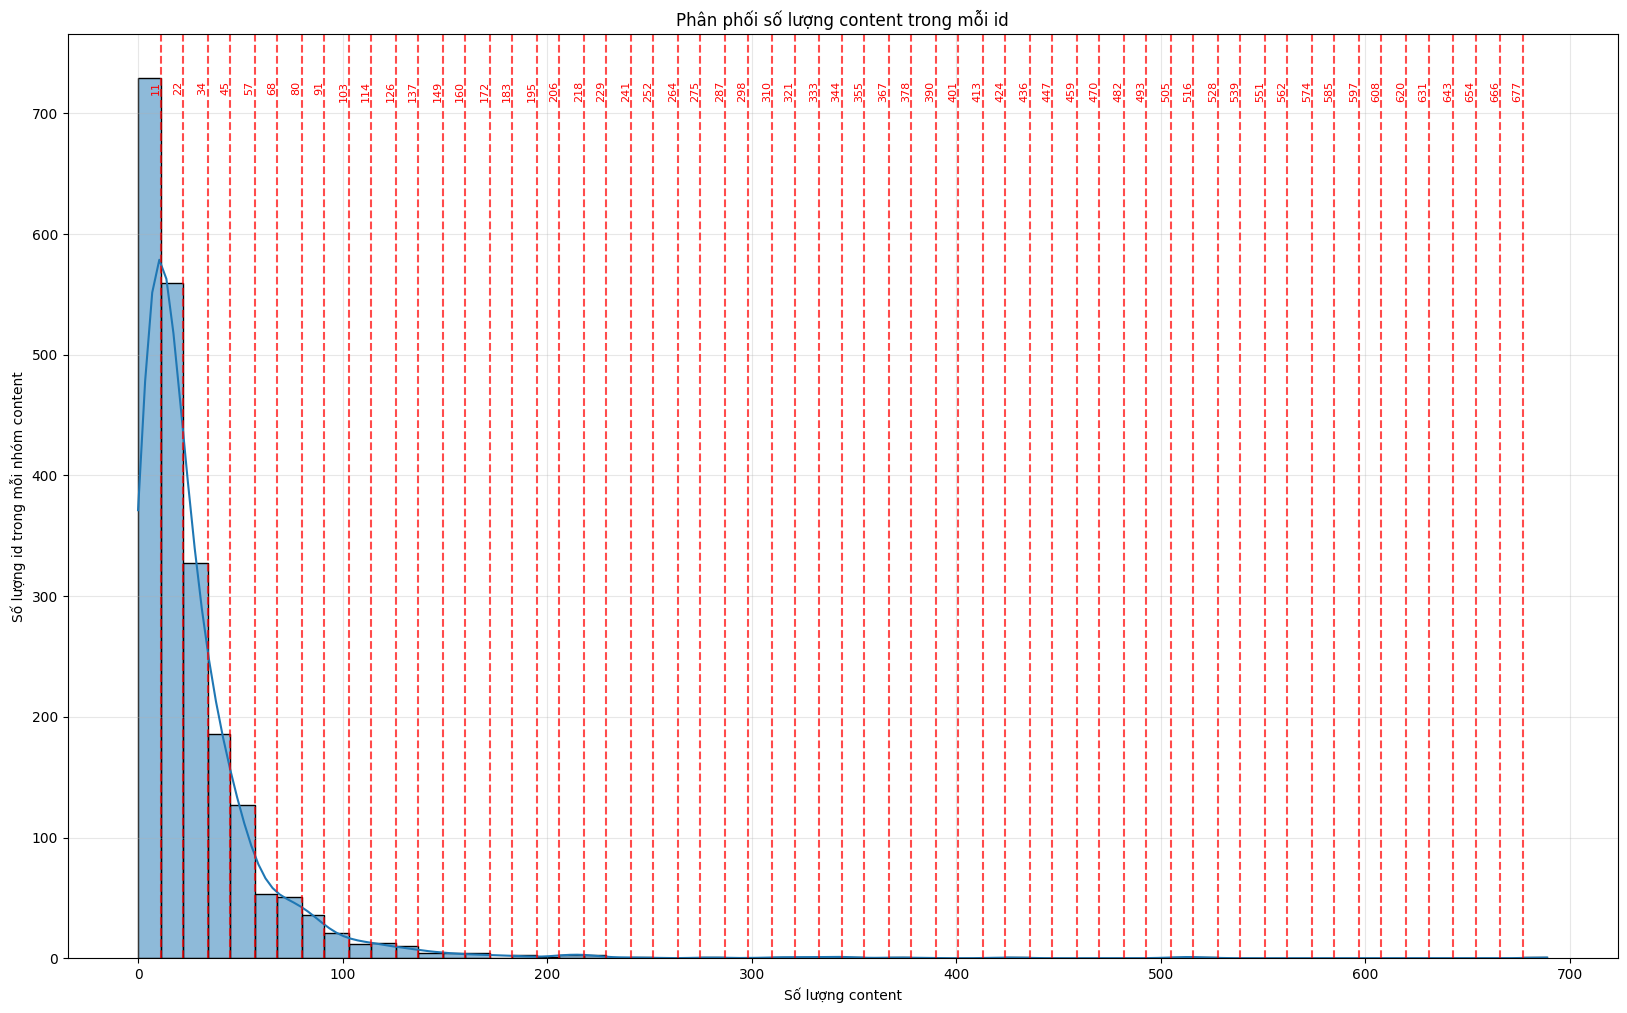

In [7]:
content_count_df =  count_content_length(corpus)

In [8]:
content_count_df['content_count'].describe().to_dict()

{'count': 2157.0,
 'mean': 27.647658785350025,
 'std': 39.66788270983583,
 'min': 0.0,
 '25%': 7.0,
 '50%': 17.0,
 '75%': 34.0,
 'max': 689.0}

In [9]:
content_count_df[content_count_df['content_count'] == 0].sort_values(by='content_count', ascending=False)

,id,content_count
2147,2147,0


In [10]:
from pyvi import ViTokenizer

def count_tokens(text: str):  
    tokenized_text = ViTokenizer.tokenize(text)
    token_count = len(tokenized_text.split())

    return  token_count

In [11]:
def token_stats(corpus):
    token_counts = []

    for item in corpus: 

        if "content" in item: 
            content = item["content"]
            
            for article in content: 
                token = count_tokens(article['content_Article'])
                token_counts.append(token)


    content_stats = pd.DataFrame({
        "token_count": token_counts
    })
    return content_stats

content_stats = token_stats(corpus)


In [14]:
content_stats.describe()

,token_count
count,59636.000000
mean,243.202076
std,500.600367
min,0.000000
25%,77.000000
50%,146.000000
75%,273.000000
max,52473.000000


In [15]:
content_stats

,token_count
0,44
1,44
2,180
3,965
4,740
...,...
59631,199
59632,5091
59633,43
59634,308


In [16]:
import numpy as np 

def plot_content_stats(content_stats):
    print("\nThống kê về phân bố kí tự và token:")
    print(f"Tổng số bài viết: {len(content_stats)}")
    print(f"Trung bình số token mỗi bài: {content_stats['token_count'].mean():.2f}")
    print(f"Số token ít nhất: {content_stats['token_count'].min()}")
    print(f"Số token nhiều nhất: {content_stats['token_count'].max()}")


    print("\nPhân vị phân bố token:")
    for p in [5, 25, 50, 75, 95]:
        print(f"{p}%: {np.percentile(content_stats['token_count'], p):.1f}")

    plt.figure(figsize=(20, 8))

    sns.boxplot(y=content_stats['token_count'])
    plt.title('Boxplot số lượng token trong content_article')
    plt.ylabel('Số lượng token')
    plt.xlabel('')

    plt.tight_layout()
    plt.show()
    plt.close()



Thống kê về phân bố kí tự và token:
Tổng số bài viết: 59636
Trung bình số token mỗi bài: 243.20
Số token ít nhất: 0
Số token nhiều nhất: 52473

Phân vị phân bố token:
5%: 31.0
25%: 77.0
50%: 146.0
75%: 273.0
95%: 683.0


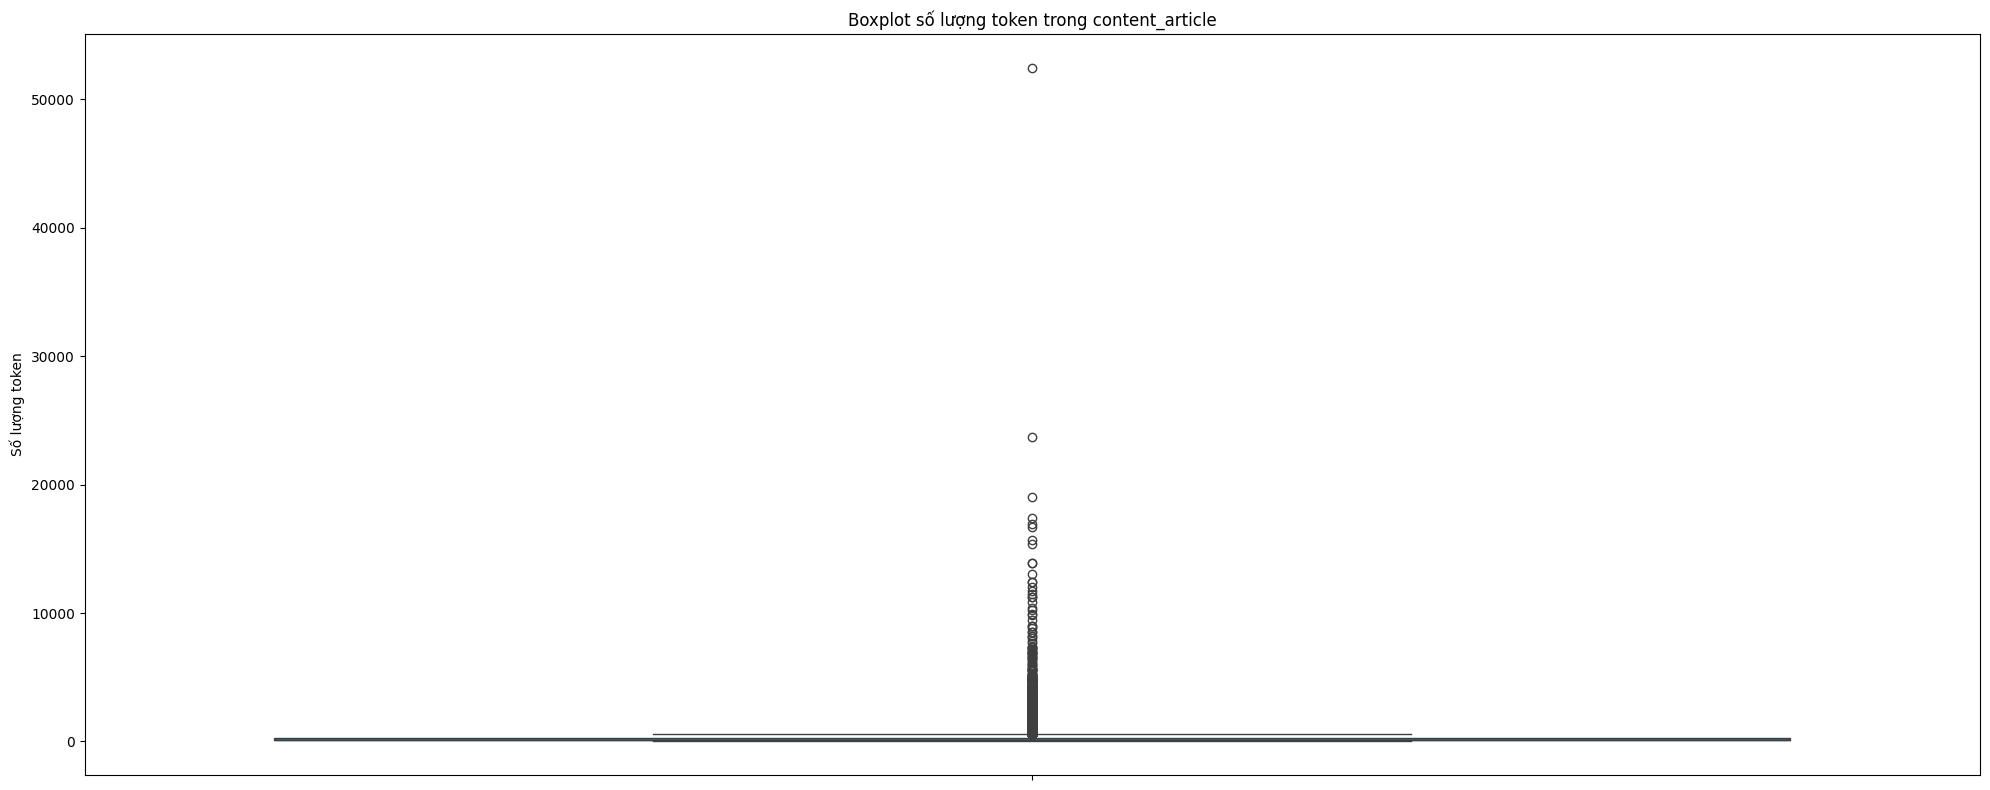

In [17]:
plot_content_stats(content_stats)

In [21]:
content_stats[ content_stats['token_count'] > 10024].sort_values(by='token_count', ascending=False) 

,token_count
39414,52473
23825,23674
58398,19032
55822,17425
58850,16942
30058,16736
4390,15682
50660,15383
4051,13894
33829,13863


**Nhận xét**: 
1. Phân bố số lượng aid trong mỗi id của bộ corpus thường tập trung vào khoảng từ 0 -> 50 content, cá biệt có một số phần dữ liệu đưa phân chia thành hơn 500 các aid nhỏ 
2. Sử dụng ViTokenizer, số lượng token của toàn bộ tập corpus có thể chứa tới hớn 10k token 

# Train 

- Các câu hỏi cần trả lời trong tập train : 
    1. Các thống kê cơ bản (số lượng câu hỏi, phân bố token của các câu hỏi)
    2. Phân bố độ dài của releavant document với mỗi câu hỏi 
    3. Phân bố kiểm tra xem 1 câu hỏi sử dụng bao nhiêu law_id khác nhau. 
    4. Sử dụng một pretrained model để tính toán độ tương đồng giữa câu hỏi và relevant document => có được trung bình độ tương đồng giữa query vs document

In [22]:
train_path = "../data/vlsp/train.json" 
train = load_json_files(train_path)

In [30]:
def count_relevant_laws_dist(train: list, bins=30):
    relevant_count = {}
    for item in train:
        id = item.get("qid", "")
        laws = item.get("relevant_laws", [])
        relevant_count[id] = len(laws)

    relevant_count_df = pd.DataFrame(list(relevant_count.items()), columns=['id', 'relevant_count'])
    print("Thống kê số lượng luật liên quan trong mỗi id:")
    print(f"Tổng số id: {len(relevant_count)}")
    print(f"Trung bình số luật liên quan mỗi id: {sum(relevant_count.values()) / len(relevant_count):.2f}")
    print(f"Số luật liên quan ít nhất: {min(relevant_count.values())}")
    print(f"Số luật liên quan nhiều nhất: {max(relevant_count.values())}")

    plt.figure(figsize=(10, 6))
    min_count = relevant_count_df['relevant_count'].min()
    max_count = relevant_count_df['relevant_count'].max()
    bin_edges = np.linspace(min_count, max_count, bins + 1, dtype=int)
    sns.histplot(relevant_count_df['relevant_count'], bins=bin_edges, kde=True)
    plt.title('Phân phối số lượng luật liên quan trong mỗi id')
    plt.xlabel('Số lượng luật liên quan')
    plt.ylabel('Số lượng id trong mỗi nhóm luật liên quan')
    plt.grid(True, alpha=0.3)

    # Vẽ các đường phân chia bins
    for edge in bin_edges[1:-1]:
        plt.axvline(edge, color='red', linestyle='--', alpha=0.7)
        plt.text(edge, plt.ylim()[1]*0.95, str(edge), color='red', rotation=90, va='top', ha='right', fontsize=8)

    plt.show()
    return relevant_count_df

Thống kê số lượng luật liên quan trong mỗi id:
Tổng số id: 2190
Trung bình số luật liên quan mỗi id: 1.34
Số luật liên quan ít nhất: 1
Số luật liên quan nhiều nhất: 9


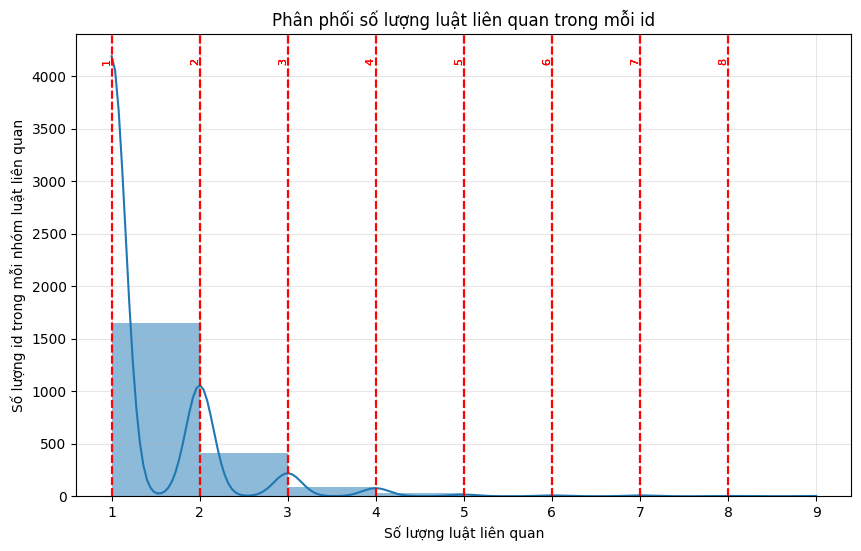

In [31]:
relevant_count = count_relevant_laws_dist(train)

In [36]:
relevant_count['relevant_count'].value_counts()

relevant_count
1    1645
2     415
3      86
4      30
5       6
6       3
7       3
8       1
9       1
Name: count, dtype: int64

In [ ]:

def setup_content(corpus: list):
    aid_to_lawid = {}
    for item in corpus:
        law_id = item.get('law_id', None)
        for aid in item.get('content', []):
            aid_id = aid.get('aid', None)
            if aid_id is not None:
                aid_to_lawid[aid_id] = law_id
    return aid_to_lawid


def count_lawid_per_quest(corpus: list, train_set: list):
    aid_to_lawid = setup_content(corpus)
    lawid_count = {}
    for item in train_set:
        qid = item.get('qid')
        lawid_count[qid] = set()
        for law_relevant in item.get('relevant_laws', []):
            lawid = aid_to_lawid.get(law_relevant, None)
            if lawid is not None:
                lawid_count[qid].add(lawid)
        lawid_count[qid] = len(lawid_count[qid])
    return lawid_count


In [42]:
lawid_count = count_lawid_per_quest(corpus, train)

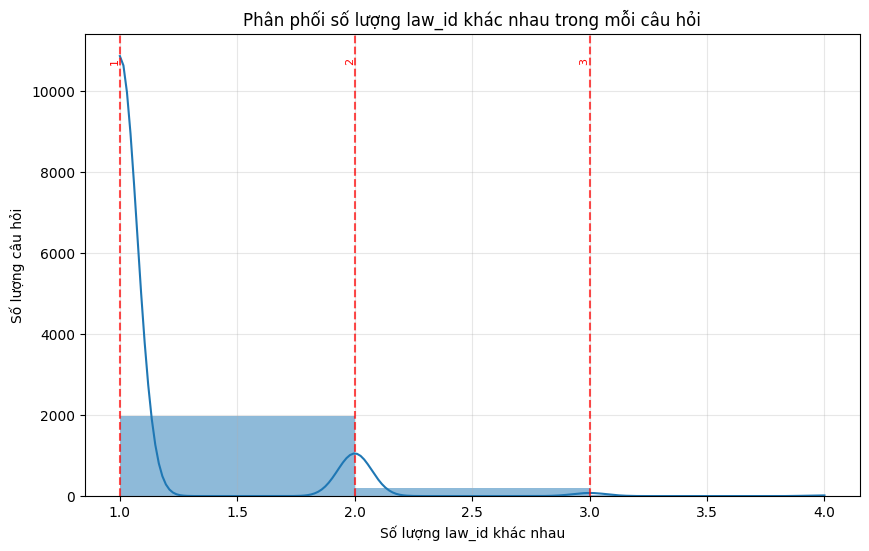

In [46]:
lawid_count_df = pd.DataFrame(list(lawid_count.items()), columns=['qid', 'num_lawid'])

plt.figure(figsize=(10, 6))
bins = min(30, lawid_count_df['num_lawid'].nunique())
bin_edges = np.linspace(lawid_count_df['num_lawid'].min(), lawid_count_df['num_lawid'].max(), bins + 1, dtype=int)
sns.histplot(lawid_count_df['num_lawid'], bins=bin_edges, kde=True)
plt.title('Phân phối số lượng law_id khác nhau trong mỗi câu hỏi')
plt.xlabel('Số lượng law_id khác nhau')
plt.ylabel('Số lượng câu hỏi')
plt.grid(True, alpha=0.3)

for edge in bin_edges[1:-1]:
    plt.axvline(edge, color='red', linestyle='--', alpha=0.7)
    plt.text(edge, plt.ylim()[1]*0.95, str(edge), color='red', rotation=90, va='top', ha='right', fontsize=8)

plt.show()

**Note** : 
1. Số lượng các doc liên quan thường tập trung vào khoảng từ 1 -> 4, không xuất hiện nhiều cho khoảng từ 5 -> 9. 
2. Các doc thường nằm trong một phân cụm nhất định (1 - 2 law_id) không có những câu cần nhiều law_id khác nhau để trả lời 